# <center> <font size="15"> <span style='background :#035efc'> CSE 310: ARTIFICIAL INTELLIGENCE</span> </font> </center>
<span style='background :yellow'> </span> 

# <center> <font size="7"> <span style='background :#035efc'> SKELETON BASED ACTION RECOGNITION</span> </font> </center>


# <font size= 6>Problem Statement </font>

<br>
<font size= 4>
Description: Develop and Evaluate a machine learning model for 3D skeleton-based action recognition using UTD MHAD dataset.     
<br>  
Train/Test Split Criteria: Even subjects (S2, S4, S6, S8) for Training and the rest (S1, S3, S5, S7) for testing.  
<br>
Feature: Euclidean distance Distance feature (Shoulder center joint to remaining all joints) </font>


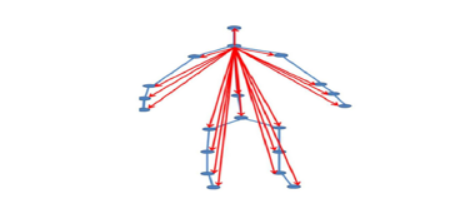

 # <font size= 4> TEAM 17</font>
 <font size= 4> Sruti L - E0119018 </font>

# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings
warnings.filterwarnings('ignore')
from mpl_toolkits import mplot3d
from scipy.io import loadmat
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB,GaussianNB
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score


# Reading the data then spliting it into train and test

In [2]:
train = []
test = []
path = "./Skeleton/"
for file in os.listdir(path):
    if file.endswith(".mat"):
        if "s2" in file or "s4" in file or "s6" in file or "s8" in file:
            train.append([loadmat(path+file)["d_skel"],file.split("_")[0]])
        else:
            test.append([loadmat(path+file)["d_skel"],file.split("_")[0]])

# Finding minimum and maximum frame count

In [3]:
def findFrames(file):
    action_dict = loadmat("./Skeleton/"+file)
    action = action_dict["d_skel"]
    return action.shape[2]


In [4]:

files = os.listdir(path)
len(files)
frames = []
for file in files:
    if(file.endswith(".mat")) :
        frame = findFrames(file)
        frames.append(frame)

min_frame_count = min(frames)
min_frame_file = files[frames.index(min_frame_count)]

max_frame_count = max(frames)
max_frame_file = files[frames.index(max_frame_count)]

print("Maximum:")
print(max_frame_file)
print(max_frame_count)
print("Minimum:")
print(min_frame_file)
print(min_frame_count)

Maximum:
a21_s8_t2_skeleton.mat
125
Minimum:
a20_s4_t3_skeleton.mat
41


# Variable length handling 

In [5]:
def trim(skl):
    val = skl.shape[2]
    if val > 40:
        if val>120:
            skl = skl[:,:,::3]
        elif val>80:
            skl = skl[:,:,::2]
        val = skl.shape[2]
        split = val - 40
        split = int(split/2)
        skl = skl[:,:,split:split+40]
        return skl

In [6]:
print(train[0][0].shape) #no of joints, dim, no of frames

(20, 3, 67)


In [7]:
print(trim(train[0][0]).shape)

(20, 3, 40)


#  Finding eculidian distance 



$dist= \sqrt{(x_1 - x_2)^2 + (y_1 - y_2)^2 +(z_1 - z_2)^2}$



In [8]:
def dist_func(skl):
    d = lambda x1,y1,z1,x2,y2,z2 : ((x1-x2)**2 + (y1-y2)**2 + (z1-z2)**2)**0.5
    dvals = d(skl[:,0,:],skl[:,1,:],skl[:,2,:],skl[1,0,:],skl[1,1,:],skl[1,2,:])
    
    return dvals

# Finding distance for the values stored in train and test dataset

In [9]:
def distance_action(mats):
    x = []
    y = []
    for skl in mats:
        x.append(dist_func(trim(skl[0])).flatten())
        y.append(skl[1]) #action label
    return x,y

In [10]:
X_train,y_train = distance_action(train)
X_test,y_test = distance_action(test)

# Evaluating the model

## Logistic regression

In [11]:
logreg = LogisticRegression()
logreg.fit(X_train,y_train)
y_pred=logreg.predict(X_test)

print("Accuracy",(accuracy_score(y_test,y_pred)))

Accuracy 0.6357308584686775


<AxesSubplot:>

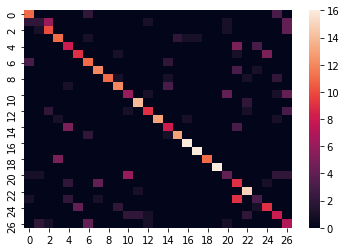

In [12]:
sns.heatmap(confusion_matrix(y_test,y_pred))

##  Multinomial naive bayes

In [13]:
mb=MultinomialNB()
m=MinMaxScaler()
mb.fit(m.fit_transform(X_train),y_train)
y_pred=mb.predict(m.fit_transform(X_test))

In [14]:
print("Accuracy",(accuracy_score(y_test,y_pred)))

Accuracy 0.6635730858468677


<AxesSubplot:>

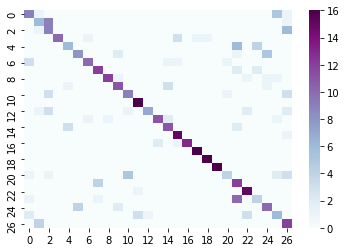

In [15]:
sns.heatmap(confusion_matrix(y_test,y_pred), cmap="BuPu")

## Gaussian naive bayes

In [16]:
mb=GaussianNB()
m=MinMaxScaler()
mb.fit(m.fit_transform(X_train),y_train)
y_pred=mb.predict(m.fit_transform(X_test))

In [17]:
print("Accuracy",(accuracy_score(y_test,y_pred)))

Accuracy 0.41067285382830626


<AxesSubplot:>

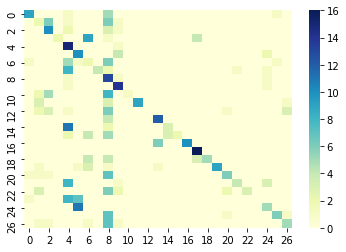

In [18]:
sns.heatmap(confusion_matrix(y_test,y_pred),cmap="YlGnBu")

## K nearest neighbor 

In [19]:
classifier = KNeighborsClassifier(n_neighbors=8,p=1)
classifier.fit(X_train,y_train)
y_pred = classifier.predict(X_test)

In [20]:
accuracy_score(y_test,y_pred)

0.44779582366589327

<AxesSubplot:>

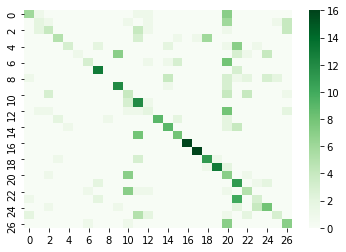

In [21]:
sns.heatmap(confusion_matrix(y_test,y_pred), cmap="Greens")